# PCA - Word embedding BERT

### Read df
- idx: Indice associato da BERT ad una specifica word

In [1]:
import pandas as pd

TARGET_DATASET = 'TwReyes2013'
df = pd.read_pickle("../reports/{}.pca/PCA_2D.pkl".format(TARGET_DATASET))
df

,principal component 1,principal component 2,idx,#+,#-,#,coefficient
0,-2.855047,-10.375413,101.0,10000.0,30000.0,40000.0,-0.500000
1,-3.565986,-0.898380,10166.0,93.0,114.0,207.0,-0.101449
2,9.985498,1.493686,19387.0,2146.0,9544.0,11690.0,-0.632849
3,1.403732,14.940429,16099.0,2.0,0.0,2.0,1.000000
4,22.539894,-11.893715,8202.0,24.0,55.0,79.0,-0.392405
...,...,...,...,...,...,...,...
18805,5.562513,13.013296,26701.0,0.0,1.0,1.0,-1.000000
18806,-9.955718,-4.970077,29313.0,0.0,1.0,1.0,-1.000000
18807,-12.059887,2.280708,9141.0,0.0,1.0,1.0,-1.000000
18808,-3.245529,15.275799,17411.0,0.0,1.0,1.0,-1.000000


### Keep rows which occurence is above median value

In [2]:
print('Median occurence value: {}'.format(df['#'].median()))
df = df[df['#']>df['#'].median()]
df

Median occurence value: 6.0


,principal component 1,principal component 2,idx,#+,#-,#,coefficient
0,-2.855047,-10.375413,101.0,10000.0,30000.0,40000.0,-0.500000
1,-3.565986,-0.898380,10166.0,93.0,114.0,207.0,-0.101449
2,9.985498,1.493686,19387.0,2146.0,9544.0,11690.0,-0.632849
4,22.539894,-11.893715,8202.0,24.0,55.0,79.0,-0.392405
5,20.961819,-10.928490,3240.0,31.0,91.0,122.0,-0.491803
...,...,...,...,...,...,...,...
18027,-14.757614,5.214269,13136.0,0.0,8.0,8.0,-1.000000
18042,-0.733205,18.829499,26276.0,0.0,7.0,7.0,-1.000000
18051,4.114671,14.014410,27079.0,0.0,8.0,8.0,-1.000000
18087,-4.436225,18.345455,23880.0,0.0,8.0,8.0,-1.000000


### Occurence histogram

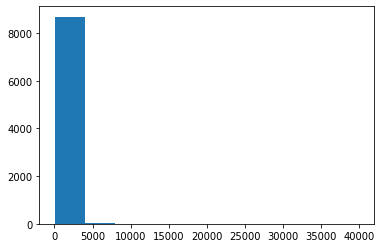

In [3]:
import matplotlib.pyplot as plt

plt.hist(df['#'])
plt.show()

### Plot principal components

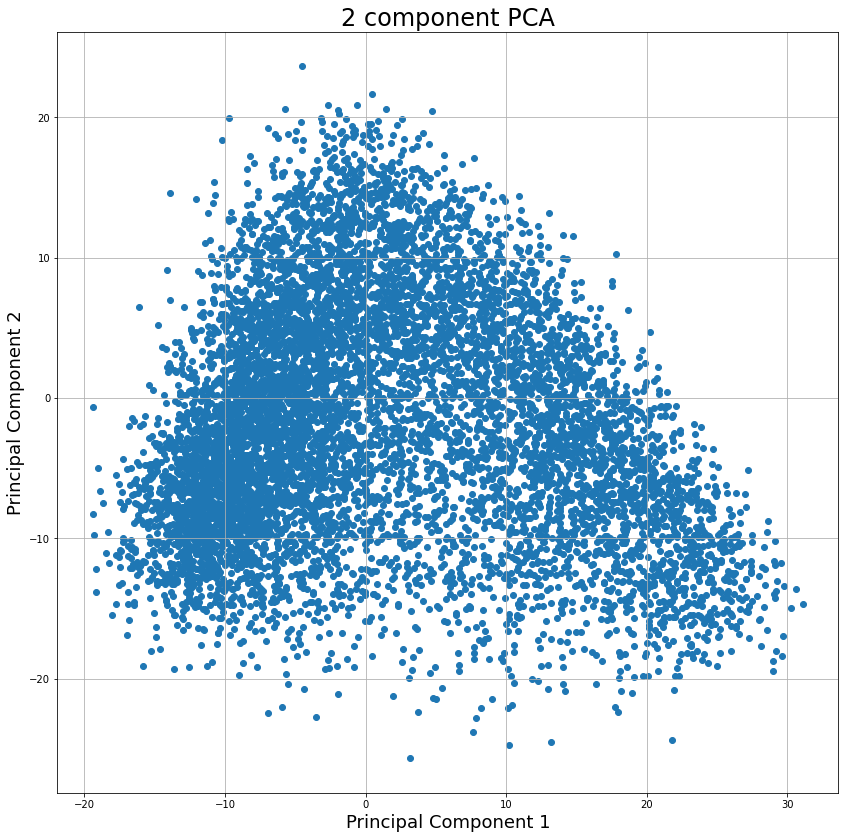

In [4]:
fig = plt.figure(figsize = (14, 14))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 18)
ax.set_ylabel('Principal Component 2', fontsize = 18)
ax.set_title('2 component PCA', fontsize = 24)
ax.scatter(df["principal component 1"], df["principal component 2"])
ax.grid()

### Most discriminating ironic words

In [5]:
ironic_df = df.sort_values(by=['coefficient'], ascending=False)
ironic_df = ironic_df[ironic_df['coefficient'] > 0]
ironic_df

,principal component 1,principal component 2,idx,#+,#-,#,coefficient
3820,-10.505046,-4.735441,12599.0,10.0,0.0,10.0,1.000000
3781,-8.890252,-5.094718,5225.0,8.0,0.0,8.0,1.000000
10109,-10.290253,-6.510891,11770.0,9.0,0.0,9.0,1.000000
3934,-11.641045,-5.446494,5131.0,7.0,0.0,7.0,1.000000
1939,-0.211465,18.717842,25200.0,8.0,0.0,8.0,1.000000
...,...,...,...,...,...,...,...
126,2.990130,3.250175,5653.0,39.0,38.0,77.0,0.012987
2969,-11.701909,-5.120001,3116.0,42.0,41.0,83.0,0.012048
635,-8.374843,-13.179774,3849.0,49.0,48.0,97.0,0.010309
55,-8.340305,-8.367036,2021.0,691.0,681.0,1372.0,0.007289


### Most discriminating non ironic words

In [6]:
nonironic_df = df.sort_values(by=['coefficient'], ascending=True)
nonironic_df = nonironic_df[nonironic_df['coefficient'] < 0]
nonironic_df

,principal component 1,principal component 2,idx,#+,#-,#,coefficient
18167,5.576248,17.320093,21153.0,0.0,7.0,7.0,-1.000000
14549,-11.394665,-9.303361,4541.0,0.0,11.0,11.0,-1.000000
14550,12.134712,6.863072,13373.0,0.0,13.0,13.0,-1.000000
14551,-6.607970,-5.341793,18853.0,0.0,20.0,20.0,-1.000000
14552,0.017570,14.272633,5447.0,0.0,8.0,8.0,-1.000000
...,...,...,...,...,...,...,...
3931,13.166555,4.420663,19739.0,28.0,29.0,57.0,-0.017544
2682,-9.919100,-4.035137,3696.0,58.0,60.0,118.0,-0.016949
2408,-6.627930,-8.916285,3374.0,40.0,41.0,81.0,-0.012346
562,-13.358565,-9.561859,2667.0,80.0,82.0,162.0,-0.012346


### Plot principal components: ironic vs non ironic¶

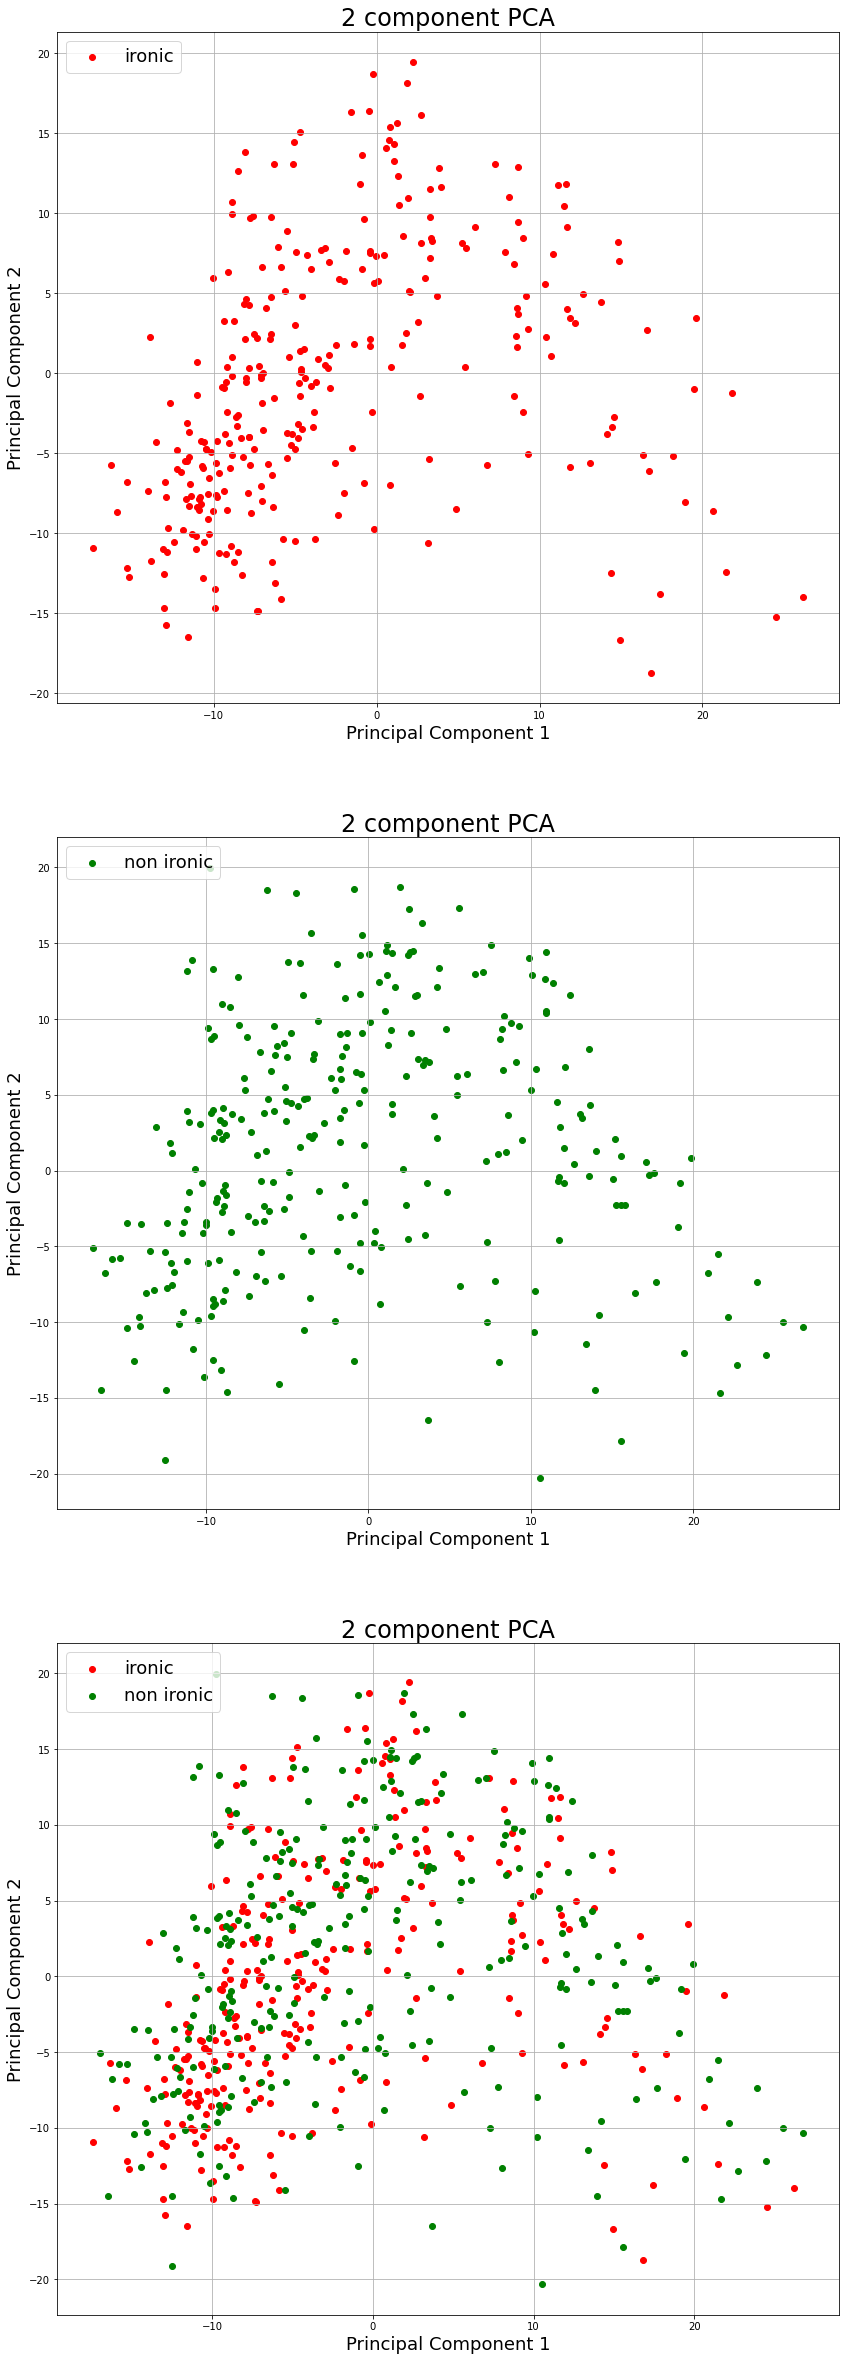

In [7]:
TOP_VALUE = 300
ironic_df = ironic_df.head(TOP_VALUE)
nonironic_df = nonironic_df.head(TOP_VALUE)

# Plot value
fig = plt.figure(figsize = (14, 14*3))

# Ironic
ax = fig.add_subplot(3,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 18)
ax.set_ylabel('Principal Component 2', fontsize = 18)
ax.set_title('2 component PCA', fontsize = 24)
ax.scatter(ironic_df["principal component 1"], ironic_df["principal component 2"], c='r', label='ironic')
ax.grid()
plt.legend(loc='upper left', fontsize = 18);

# Non ironic
ax = fig.add_subplot(3,1,2)
ax.set_xlabel('Principal Component 1', fontsize = 18)
ax.set_ylabel('Principal Component 2', fontsize = 18)
ax.set_title('2 component PCA', fontsize = 24)
ax.scatter(nonironic_df["principal component 1"], nonironic_df["principal component 2"], c='g', label='non ironic')
ax.grid()
plt.legend(loc='upper left', fontsize = 18);

# Both
ax = fig.add_subplot(3,1,3)
ax.set_xlabel('Principal Component 1', fontsize = 18)
ax.set_ylabel('Principal Component 2', fontsize = 18)
ax.set_title('2 component PCA', fontsize = 24)
ax.scatter(ironic_df["principal component 1"], ironic_df["principal component 2"], c='r', label='ironic')
ax.scatter(nonironic_df["principal component 1"], nonironic_df["principal component 2"], c='g', label='non ironic')
ax.grid()
plt.legend(loc='upper left', fontsize = 18);

plt.show()